In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [28]:
zoo = pd.read_csv("C:\\Users\\PRATIK\\Downloads\\Zoo.csv")
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [29]:
zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# Data Exploration

<AxesSubplot:>

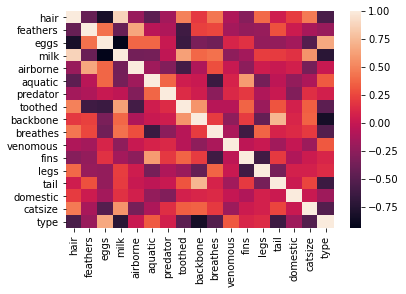

In [4]:
cor = zoo.corr()
sns.heatmap(cor)

C:\Users\anupg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feathers', ylabel='toothed'>

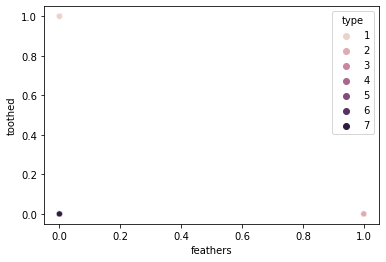

In [9]:
sns.scatterplot(zoo['feathers'],zoo['toothed'],hue=zoo['type'])

C:\Users\anupg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='eggs', ylabel='toothed'>

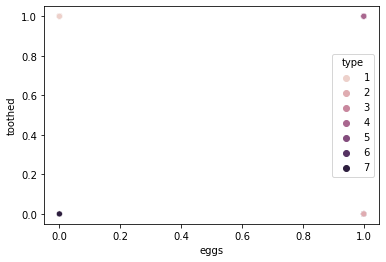

In [10]:
sns.scatterplot(zoo['eggs'],zoo['toothed'],hue=zoo['type'])

C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\anupg\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

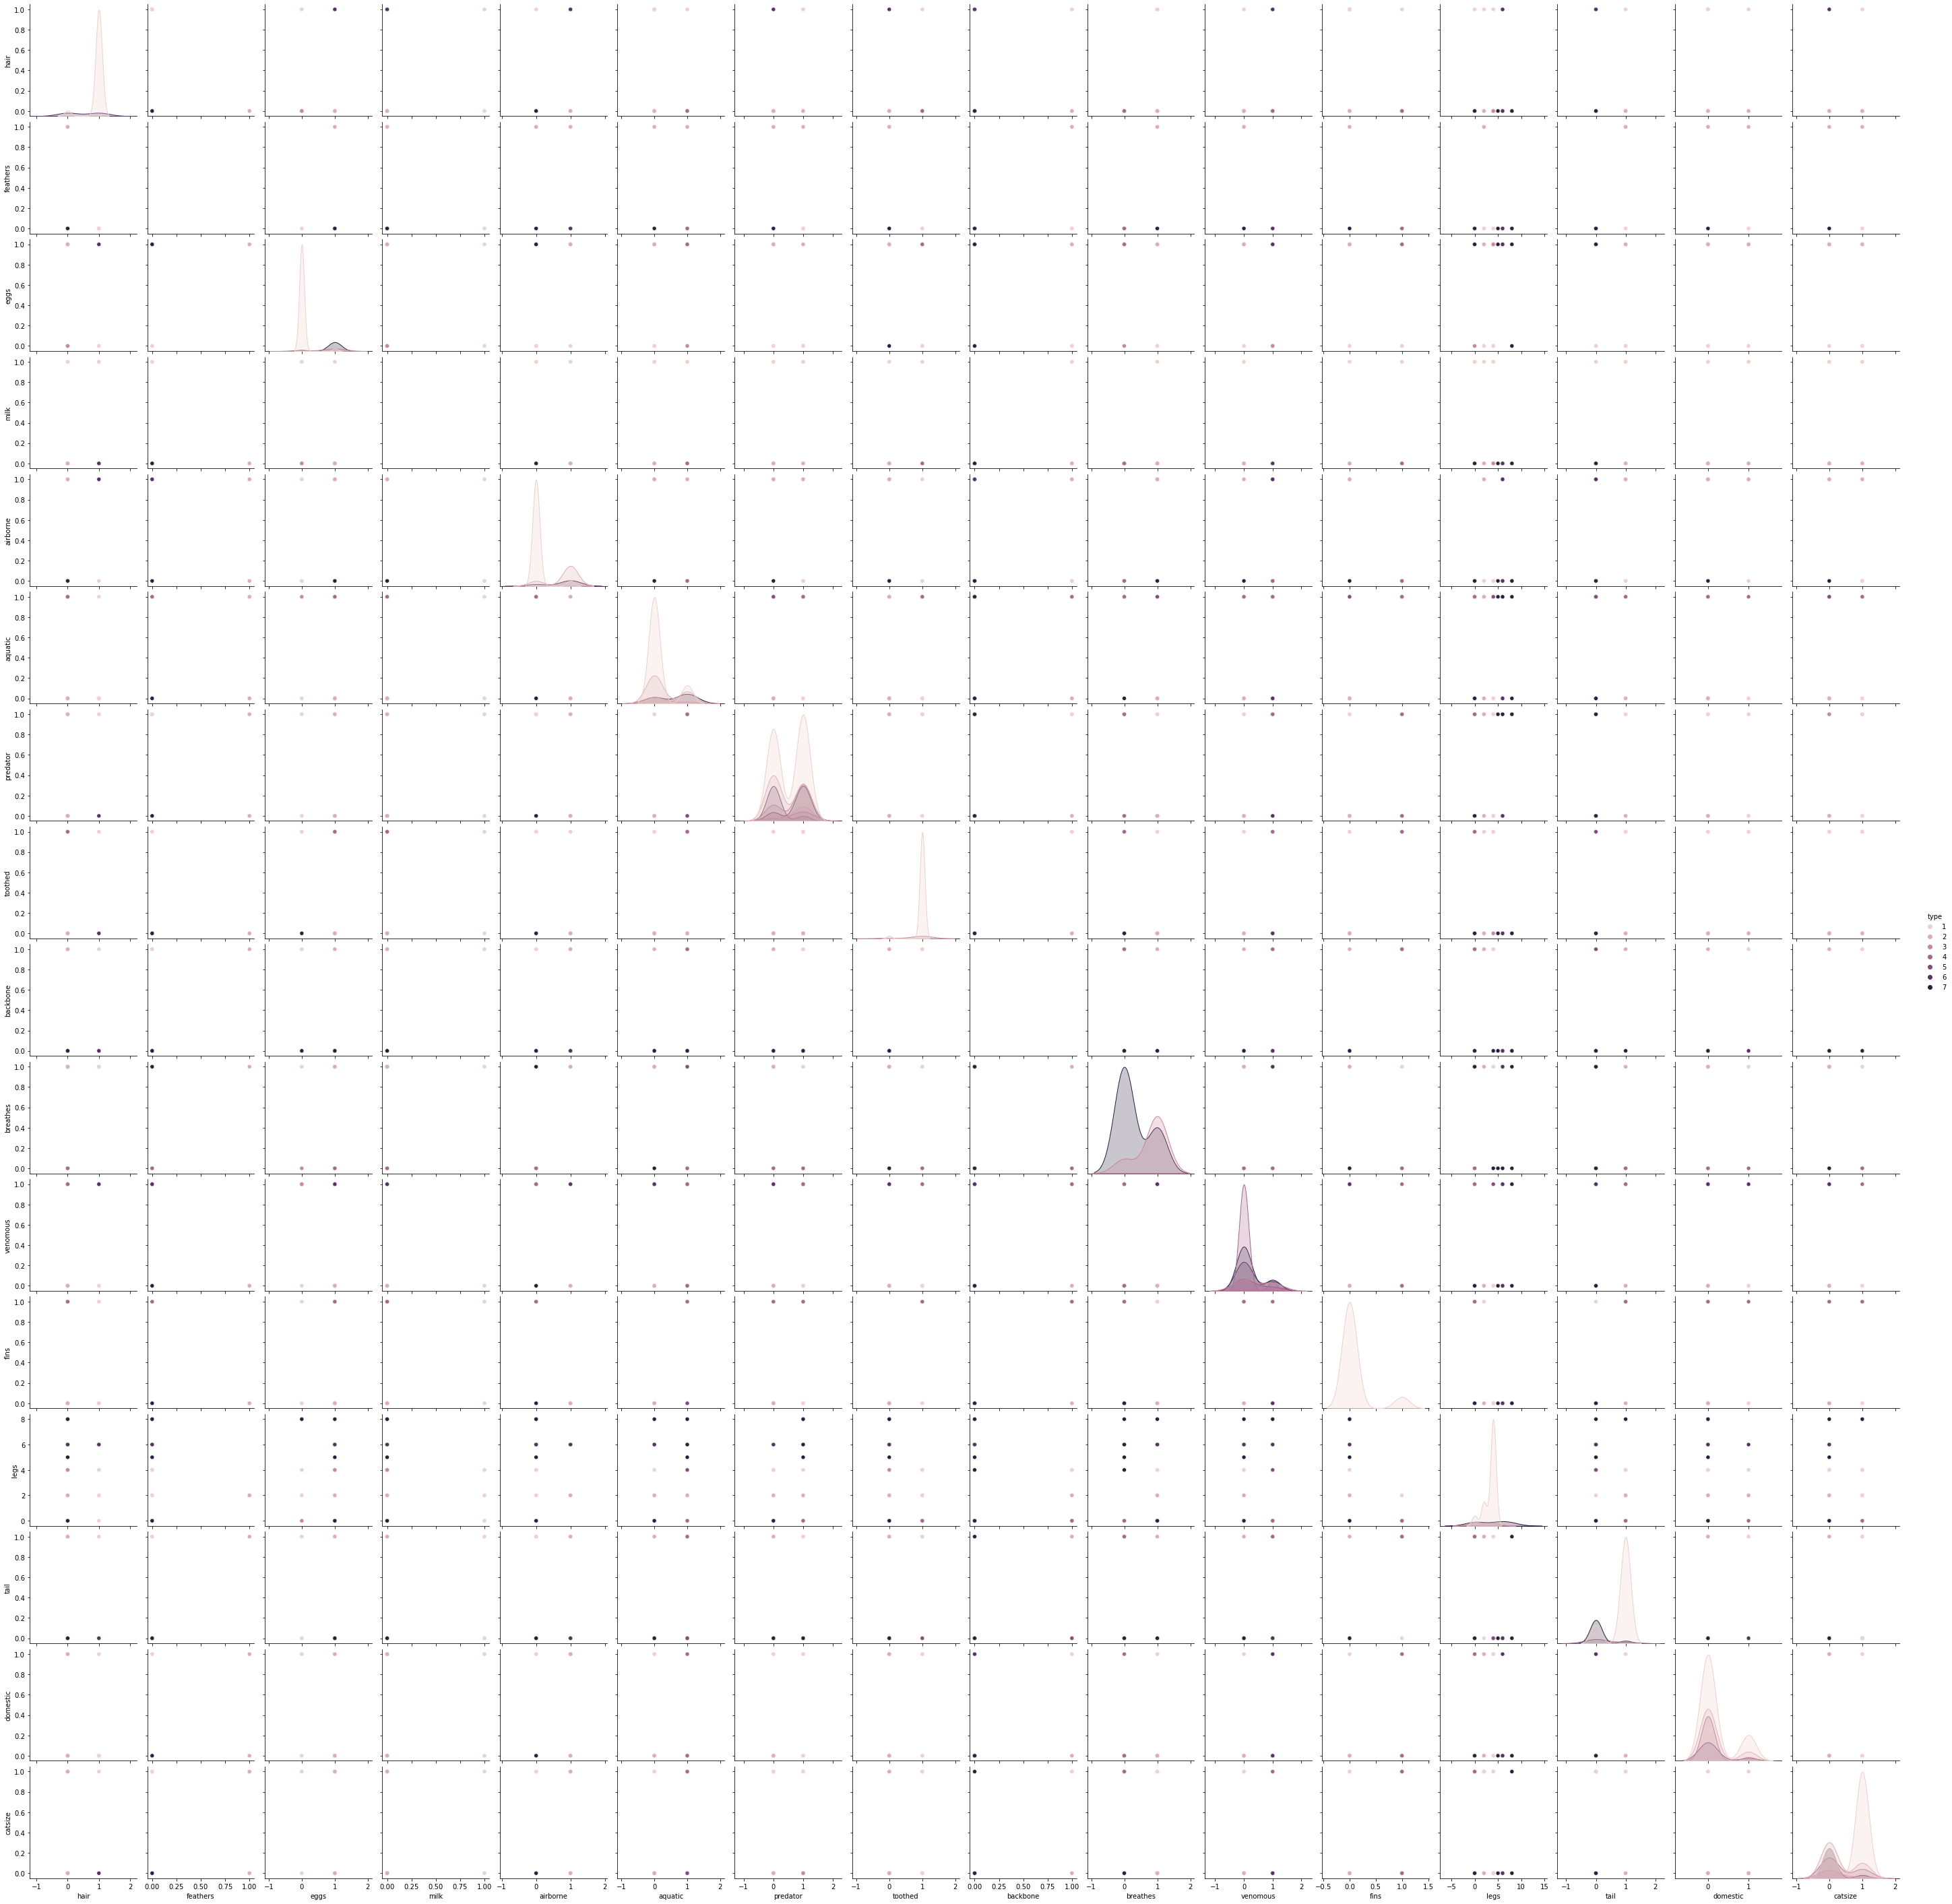

In [11]:
sns.pairplot(zoo,hue='type')
plt.show()

### 2. Data Processing

In [24]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [30]:
duplicates = zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

In [36]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [41]:
color_list = [("red" if i == 1 else "blue" if i == 0 else "yellow" ) for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['red', 'blue']

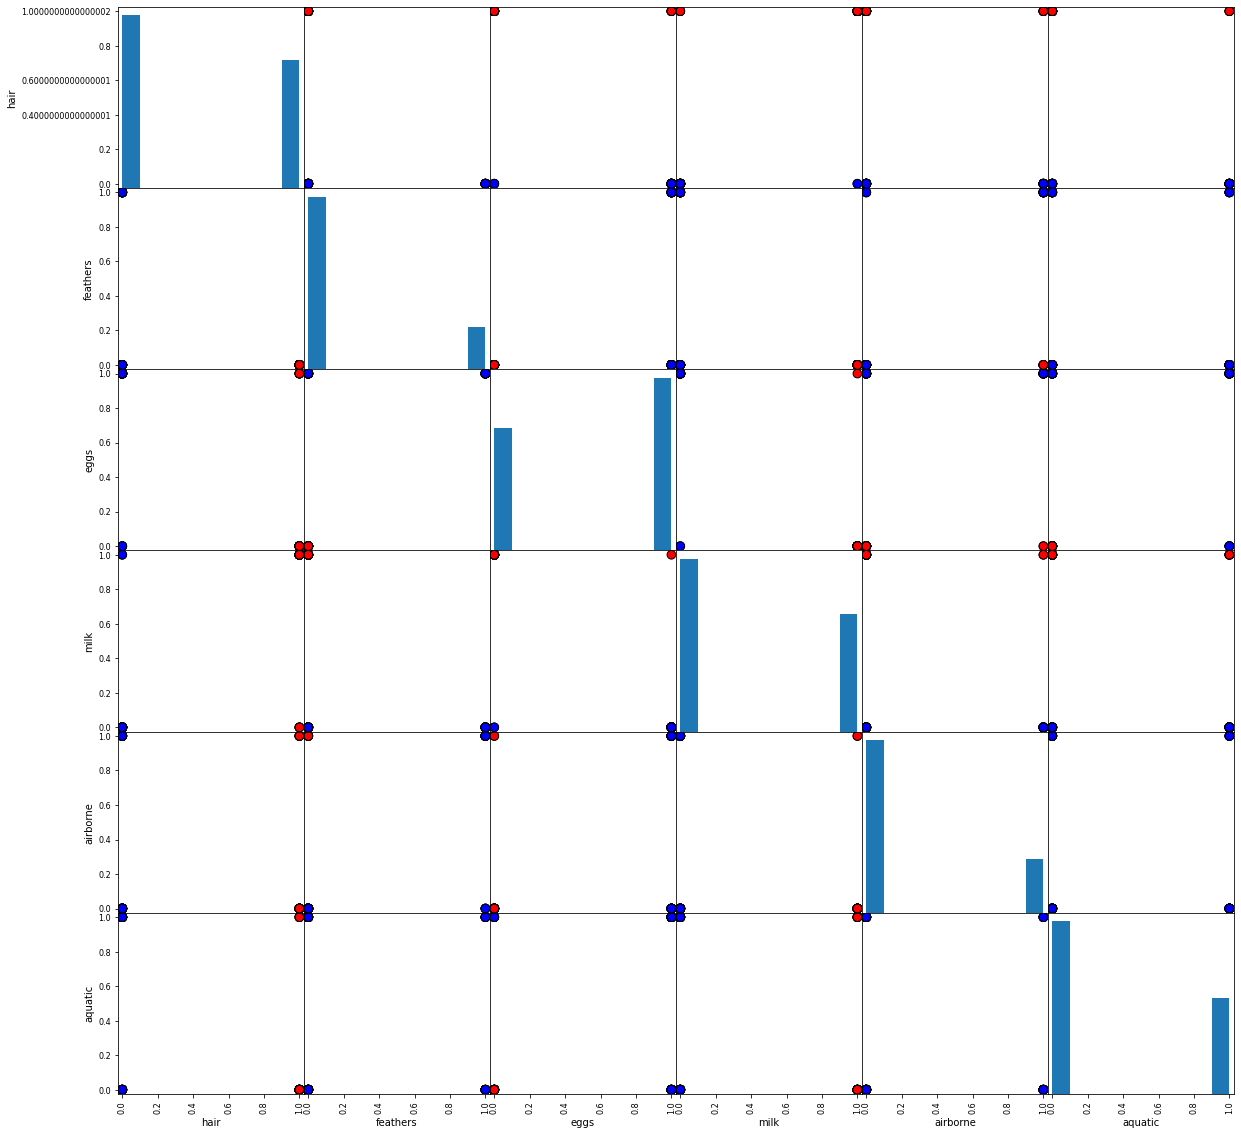

In [43]:
pd.plotting.scatter_matrix(zoo.iloc[:,:7],
                                       c=color_list,
                                       figsize= [20,20],
                                       diagonal='hist',
                                       alpha=1,
                                       s = 300,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

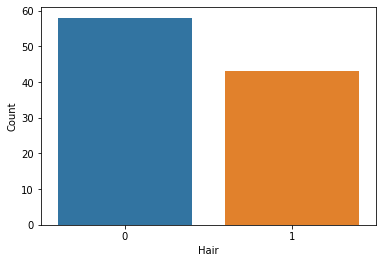

0    58
1    43
Name: hair, dtype: int64

In [45]:
sns.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

In [48]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:17]
y = zoo.iloc[:,17]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
# Declare the model
clf = KNeighborsClassifier(n_neighbors=3)

# Train the model
clf.fit(X_train, y_train)
y_pred_KNeighborsClassifier = clf.predict(X_test)

scrs = []

#Get Accuracy Score
score = accuracy_score(y_pred_KNeighborsClassifier,y_test)
scrs.append(score)

In [50]:
from sklearn.model_selection import cross_val_score


cv_scores = [] # store cross vadidation score of all the algorithms.

score_knn=cross_val_score(clf, X,y, cv=10)

print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.95 (+/- 0.10) with k value equals to 3


C:\Users\anupg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


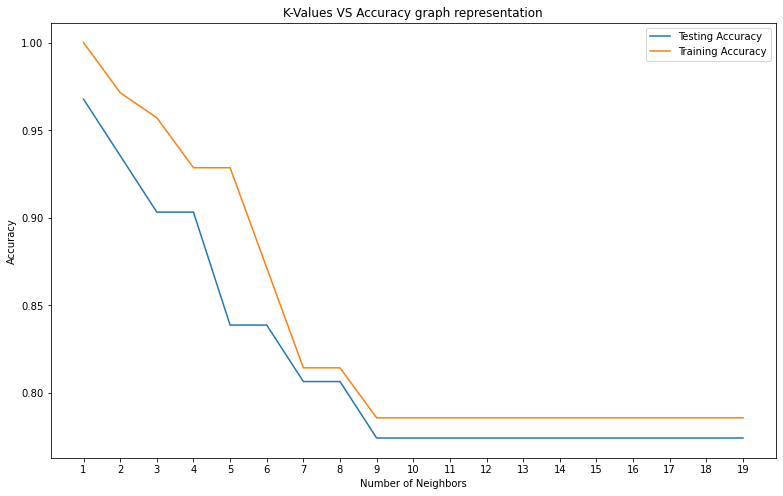

Best accuracy is 0.967741935483871 with K = 1


In [51]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))